# Collecting Data using Job API 

### Objective: Determine the number of jobs currently open for various technologies  and for various locations

* Collect job data from Jobs API
* Store the collected data into an excel spreadsheet

Collect the number of job postings for the following locations using the API:
* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


In [30]:
import pandas as pd
import requests

#### Preparation - Flask

In [31]:
# import requests

# url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json'
# filename = 'jobs.json'

# response = requests.get(url)

# with open(filename, 'wb') as f:
#     f.write(response.content)

In [32]:
# # Flask 
# import flask
# from flask import request, jsonify
# import requests
# import re

# def get_data(key,value,current):
#     results = list()
#     pattern_dict = {
#         'C'      : '(C)',
#         'C++'    : '(C\+\+)',
#         'Java'   :'(Java)',
#         'C#'     : '(C\#)',
#         'Python' :'(Python)',
#         'Scala' : '(Scala)',
#         'Oracle' : '(Oracle)',
#         'SQL Server': '(SQL Server)',
#         'MySQL Server' :'(MySQL Server)',
#         'PostgreSQL':'(PostgreSQL)',
#         'MongoDB'    : '(MongoDB)',
#         'JavaScript'    : '(JavaScript)',
#         'Los Angeles' :'(Los Angeles)',
#         'New York':'(New York)',
#         'San Francisco':'(San Francisco)',
#         'Washington DC':'(Washington DC)',
#         'Seattle':'(Seattle)',
#         'Austin':'(Austin)',
#         'Detroit':'(Detroit)',
        
        
        
        
        
#     }
#     for rec in current:
#         print(rec[key])
#         print(type(rec[key]))
#         print(rec[key].find(value))
#         #if rec[key].find(value) != -1:
#         import re
#         #reex_str = """(C)|(C\+\+)|(JavaScript)|(Java)|(C\#)|(Python)|(Scala)|(Oracle)|(SQL Server)|(MySQL Server)|(PostgreSQL)|(MongoDB)"""
#         if re.search(pattern_dict[value],rec[key]) != None:
#             results.append(rec)
#     return results

# app = flask.Flask(__name__)

# import json
# data = None
# with open('jobs.json',encoding='utf-8') as f:
#     # returns JSON object as
#     # a dictionary
#     data = json.load(f)
    
    

# @app.route('/', methods=['GET'])
# def home():
    
#     return '''<h1>Welcome to flask JOB search API</p>'''


# @app.route('/data/all', methods=['GET'])
# def api_all():
#     return jsonify(data)


# @app.route('/data', methods=['GET'])
# def api_id():
#     # Check if keys such as Job Title,KeySkills, Role Category and others  are provided as part of the URL.
#     #  Assign the keys to the corresponding variables..
#     # If no key is provided, display an error in the browser.
#     res = None
#     for req in request.args:
        
#         if req == 'Job Title':
#             key = 'Job Title'
#         elif req == 'Job Experience Required' :
#             key='Job Experience Required'
#         elif req == 'Key Skills' :
#             key='Key Skills'
            
#         elif req == 'Role Category' :
#             key='Role Category'
#         elif req == 'Location' :
#             key='Location'
        
#         elif req == 'Functional Area' :
#             key='Functional Area'
        
#         elif req == 'Industry' :
#             key='Industry'
#         elif req == 'Role' :
#             key='Role'
#         elif req=="id":
#              key="id"
#         else:
#             pass
    
#         value = request.args[key]
#         if (res==None):
#             res = get_data(key,value,data)
#         else:
#             res = get_data(key,value,res)

#     # Use the jsonify function from Flask to convert our list of
#     # Python dictionaries to the JSON format.
#     return jsonify(res)

# app.run()

#### Write a function to get the number of jobs for the Python technology.<br>

> Note: While using the lab you need to pass the **payload** information for the **params** attribute in the form of **key** **value** pairs.
  Refer the ungraded **rest api lab** in the course **Python for Data Science, AI & Development**  <a href="https://www.coursera.org/learn/python-for-applied-data-science-ai/ungradedLti/P6sW8/hands-on-lab-access-rest-apis-request-http?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01">link</a>
  
 ##### The keys in the json are 
 * Job Title 
 * Job Experience Required
 * Key Skills
 * Role Category
 * Location
 * Functional Area
 * Industry 
 * Role 
 
You can also view  the json file contents  from the following <a href = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json">json</a> URL.


In [33]:
api_url="http://127.0.0.1:5000/data"
r=requests.get(api_url)
print(r.status_code)

200


In [34]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.28.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [35]:
print("request body:", r.request.body)

request body: None


In [36]:
r.headers['date']

'Sat, 06 May 2023 21:00:25 GMT'

In [37]:
r.headers['Content-Type'] # type of data
r.encoding

'utf-8'

In [38]:
r.text

'null\n'

In [39]:
def get_number_of_jobs_T(technology):

    number_of_jobs = 0

    payload={"Key Skills":technology}

    r=requests.get(api_url,params=payload)

    if r.ok: # if all is well() no errors, no network timeouts)

        data = r.json() 

        number_of_jobs += len(data)

    return technology,number_of_jobs

get_number_of_jobs_T("Python")

('Python', 1173)

#### Write a function to find number of jobs in US for a location of your choice


In [40]:
def get_number_of_jobs_L(location):
    number_of_jobs_L = 0 
    payload = {"Location" : location}
    r=requests.get(api_url, params=payload)
    
    if r.ok:
        data = r.json()
        number_of_jobs_L += len(data)
    return location, number_of_jobs_L

get_number_of_jobs_L("Los Angeles") # call the function for Los Angeles to check whether it works

('Los Angeles', 640)

### Store the results in an excel file

In [41]:
# Create a python list of all locations for which you need to find the number of jobs postings.
locations = ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin", "Detroit"]

from openpyxl import Workbook      

# Create a workbook and select the active worksheet
wb=Workbook()
ws=wb.active

ws.append(['Location', 'Number of Jobs Postings'])
for location in locations:
    ws.append(get_number_of_jobs_L(location))

wb.save("datasets/job-postings.xlsx")

"""
# another way:
Locations=["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin", "Detroit"]
for i, location in enumerate(Locations):
    num_jobs = get_number_of_jobs_L(location)[1]
    ws.cell(row=i+1, column=1, value=location)
    ws.cell(row=i+1, column=2, value=num_jobs)
"""



'\n# another way:\nLocations=["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin", "Detroit"]\nfor i, location in enumerate(Locations):\n    num_jobs = get_number_of_jobs_L(location)[1]\n    ws.cell(row=i+1, column=1, value=location)\n    ws.cell(row=i+1, column=2, value=num_jobs)\n'

#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [42]:
technologies = ["C", "C#", "C++", "Java", "JavaScript", "Python", "Scala", "Oracle", "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"]

wb=Workbook()
ws=wb.active
ws.append(["Language", "Number of Jobs Postings"])
for technology in technologies:
    ws.append(get_number_of_jobs_T(technology))
wb.save("datasets/job-postings-languages.xlsx")

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

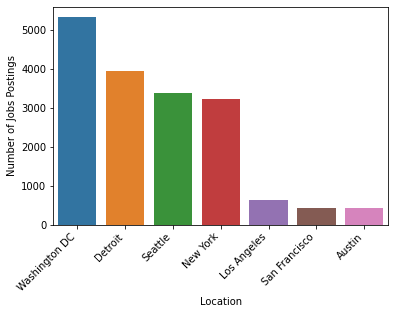

In [44]:
df_locations = pd.read_excel("job-postings.xlsx")
df_locations.sort_values("Number of Jobs Postings", ascending=False, inplace=True)

ax = sns.barplot(data=df_locations, x='Location', y='Number of Jobs Postings')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
df_locations

plt.savefig('locations.png')

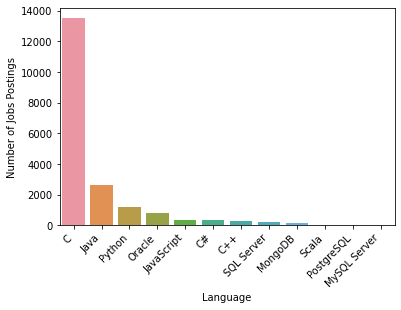

In [45]:
df_languages = pd.read_excel("job-postings-languages.xlsx")
df_languages.sort_values('Number of Jobs Postings', ascending=False, inplace=True)

ax = sns.barplot(data=df_languages, x='Language', y='Number of Jobs Postings')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.savefig('languages.png')

In [46]:
# Cach 2: save output to excel with pandas 
locations = ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin", "Detroit"]

df_locations = pd.DataFrame([])
number_of_jobs_L = []

for location in locations:
    number_of_jobs_L.append(get_number_of_jobs_L(location)[1])

df_locations = pd.DataFrame({'locations':locations, "number of job postings":number_of_jobs_L})
df_locations.sort_values("number of job postings",ascending=False, inplace=True)

df_locations

,locations,number of job postings
3,Washington DC,5316
6,Detroit,3945
4,Seattle,3375
1,New York,3226
0,Los Angeles,640
2,San Francisco,435
5,Austin,434
